## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 2.98701 | train_mse: 1.13278 | train_mae: 0.80146 |  0:00:00s


epoch 1  | loss: 0.95929 | train_mse: 0.72149 | train_mae: 0.58968 |  0:00:00s


epoch 2  | loss: 0.65784 | train_mse: 0.58794 | train_mae: 0.53704 |  0:00:01s


epoch 3  | loss: 0.45415 | train_mse: 0.48006 | train_mae: 0.49562 |  0:00:01s


epoch 4  | loss: 0.4387  | train_mse: 0.32079 | train_mae: 0.43271 |  0:00:02s


epoch 5  | loss: 0.34963 | train_mse: 0.27472 | train_mae: 0.396   |  0:00:02s


epoch 6  | loss: 0.26623 | train_mse: 0.2669  | train_mae: 0.37112 |  0:00:02s


epoch 7  | loss: 0.32971 | train_mse: 0.21404 | train_mae: 0.34786 |  0:00:03s


epoch 8  | loss: 0.33706 | train_mse: 0.21821 | train_mae: 0.35334 |  0:00:03s


epoch 9  | loss: 0.30377 | train_mse: 0.30063 | train_mae: 0.37824 |  0:00:03s


epoch 10 | loss: 0.2754  | train_mse: 0.25106 | train_mae: 0.35415 |  0:00:04s


epoch 11 | loss: 0.2728  | train_mse: 0.20348 | train_mae: 0.33348 |  0:00:04s


epoch 12 | loss: 0.26719 | train_mse: 0.18173 | train_mae: 0.30385 |  0:00:05s


epoch 13 | loss: 0.23722 | train_mse: 0.18361 | train_mae: 0.30495 |  0:00:05s


epoch 14 | loss: 0.22077 | train_mse: 0.15665 | train_mae: 0.28419 |  0:00:06s


epoch 15 | loss: 0.23693 | train_mse: 0.16819 | train_mae: 0.28725 |  0:00:06s


epoch 16 | loss: 0.26144 | train_mse: 0.17028 | train_mae: 0.29328 |  0:00:07s


epoch 17 | loss: 0.21832 | train_mse: 0.1767  | train_mae: 0.29266 |  0:00:07s


epoch 18 | loss: 0.23145 | train_mse: 0.16928 | train_mae: 0.29353 |  0:00:07s


epoch 19 | loss: 0.22485 | train_mse: 0.14403 | train_mae: 0.27334 |  0:00:08s


epoch 20 | loss: 0.21288 | train_mse: 0.13663 | train_mae: 0.26186 |  0:00:08s


epoch 21 | loss: 0.18729 | train_mse: 0.12793 | train_mae: 0.25669 |  0:00:09s


epoch 22 | loss: 0.18161 | train_mse: 0.15693 | train_mae: 0.27977 |  0:00:09s


epoch 23 | loss: 0.19859 | train_mse: 0.13376 | train_mae: 0.25472 |  0:00:09s


epoch 24 | loss: 0.20204 | train_mse: 0.12236 | train_mae: 0.24833 |  0:00:10s


epoch 25 | loss: 0.17209 | train_mse: 0.13358 | train_mae: 0.25328 |  0:00:10s


epoch 26 | loss: 0.21361 | train_mse: 0.12995 | train_mae: 0.25922 |  0:00:10s


epoch 27 | loss: 0.22169 | train_mse: 0.14151 | train_mae: 0.27669 |  0:00:11s


epoch 28 | loss: 0.19038 | train_mse: 0.12681 | train_mae: 0.25568 |  0:00:11s


epoch 29 | loss: 0.20197 | train_mse: 0.12824 | train_mae: 0.24912 |  0:00:11s


epoch 30 | loss: 0.20064 | train_mse: 0.15058 | train_mae: 0.25154 |  0:00:12s


epoch 31 | loss: 0.2071  | train_mse: 0.13721 | train_mae: 0.24357 |  0:00:12s


epoch 32 | loss: 0.14462 | train_mse: 0.11684 | train_mae: 0.23938 |  0:00:12s


epoch 33 | loss: 0.17619 | train_mse: 0.13393 | train_mae: 0.25283 |  0:00:13s


epoch 34 | loss: 0.20042 | train_mse: 0.14834 | train_mae: 0.26604 |  0:00:13s


epoch 35 | loss: 0.18547 | train_mse: 0.1398  | train_mae: 0.26608 |  0:00:13s


epoch 36 | loss: 0.19938 | train_mse: 0.12166 | train_mae: 0.25116 |  0:00:14s


epoch 37 | loss: 0.16262 | train_mse: 0.12734 | train_mae: 0.24164 |  0:00:14s


epoch 38 | loss: 0.19413 | train_mse: 0.11577 | train_mae: 0.2374  |  0:00:14s


epoch 39 | loss: 0.19153 | train_mse: 0.10965 | train_mae: 0.23654 |  0:00:15s


epoch 40 | loss: 0.13407 | train_mse: 0.1026  | train_mae: 0.23365 |  0:00:15s


epoch 41 | loss: 0.19258 | train_mse: 0.11815 | train_mae: 0.24755 |  0:00:16s


epoch 42 | loss: 0.196   | train_mse: 0.17019 | train_mae: 0.24893 |  0:00:16s


epoch 43 | loss: 0.19174 | train_mse: 0.20594 | train_mae: 0.24596 |  0:00:16s


epoch 44 | loss: 0.16735 | train_mse: 0.14996 | train_mae: 0.24567 |  0:00:17s


epoch 45 | loss: 0.20576 | train_mse: 0.10033 | train_mae: 0.23073 |  0:00:17s


epoch 46 | loss: 0.18224 | train_mse: 0.13553 | train_mae: 0.24761 |  0:00:17s


epoch 47 | loss: 0.17066 | train_mse: 0.14342 | train_mae: 0.24349 |  0:00:18s


epoch 48 | loss: 0.19661 | train_mse: 0.13794 | train_mae: 0.25434 |  0:00:18s


epoch 49 | loss: 0.20852 | train_mse: 0.13379 | train_mae: 0.25308 |  0:00:18s


epoch 50 | loss: 0.14601 | train_mse: 0.10187 | train_mae: 0.24151 |  0:00:19s


epoch 51 | loss: 0.1843  | train_mse: 0.11027 | train_mae: 0.24079 |  0:00:20s


epoch 52 | loss: 0.17523 | train_mse: 0.12455 | train_mae: 0.24378 |  0:00:20s


epoch 53 | loss: 0.17762 | train_mse: 0.17447 | train_mae: 0.29004 |  0:00:20s


epoch 54 | loss: 0.18331 | train_mse: 0.0981  | train_mae: 0.23035 |  0:00:21s


epoch 55 | loss: 0.19979 | train_mse: 0.11237 | train_mae: 0.23985 |  0:00:21s


epoch 56 | loss: 0.20681 | train_mse: 0.10664 | train_mae: 0.23296 |  0:00:21s


epoch 57 | loss: 0.19338 | train_mse: 0.12414 | train_mae: 0.25416 |  0:00:22s


epoch 58 | loss: 0.18437 | train_mse: 0.13055 | train_mae: 0.2646  |  0:00:22s


epoch 59 | loss: 0.137   | train_mse: 0.13331 | train_mae: 0.25332 |  0:00:22s


epoch 60 | loss: 0.14992 | train_mse: 0.12485 | train_mae: 0.24873 |  0:00:23s


epoch 61 | loss: 0.12825 | train_mse: 0.10514 | train_mae: 0.23442 |  0:00:23s


epoch 62 | loss: 0.14434 | train_mse: 0.10143 | train_mae: 0.22398 |  0:00:23s


epoch 63 | loss: 0.14803 | train_mse: 0.11228 | train_mae: 0.23148 |  0:00:24s


epoch 64 | loss: 0.15207 | train_mse: 0.108   | train_mae: 0.22229 |  0:00:24s


epoch 65 | loss: 0.15503 | train_mse: 0.10039 | train_mae: 0.223   |  0:00:25s


epoch 66 | loss: 0.18879 | train_mse: 0.1296  | train_mae: 0.24187 |  0:00:25s


epoch 67 | loss: 0.18555 | train_mse: 0.09356 | train_mae: 0.21686 |  0:00:25s


epoch 68 | loss: 0.15979 | train_mse: 0.09317 | train_mae: 0.21919 |  0:00:26s


epoch 69 | loss: 0.16978 | train_mse: 0.1151  | train_mae: 0.23804 |  0:00:26s


epoch 70 | loss: 0.13833 | train_mse: 0.09793 | train_mae: 0.22982 |  0:00:26s


epoch 71 | loss: 0.12725 | train_mse: 0.0915  | train_mae: 0.21913 |  0:00:27s


epoch 72 | loss: 0.14302 | train_mse: 0.08034 | train_mae: 0.20964 |  0:00:27s


epoch 73 | loss: 0.14199 | train_mse: 0.08253 | train_mae: 0.21217 |  0:00:27s


epoch 74 | loss: 0.12863 | train_mse: 0.08867 | train_mae: 0.22052 |  0:00:28s


epoch 75 | loss: 0.12564 | train_mse: 0.09761 | train_mae: 0.21398 |  0:00:28s


epoch 76 | loss: 0.11711 | train_mse: 0.08248 | train_mae: 0.20317 |  0:00:28s


epoch 77 | loss: 0.11509 | train_mse: 0.09766 | train_mae: 0.20991 |  0:00:29s


epoch 78 | loss: 0.13537 | train_mse: 0.10404 | train_mae: 0.20271 |  0:00:29s


epoch 79 | loss: 0.13268 | train_mse: 0.10736 | train_mae: 0.2037  |  0:00:30s


epoch 80 | loss: 0.11966 | train_mse: 0.11651 | train_mae: 0.21012 |  0:00:30s


epoch 81 | loss: 0.15517 | train_mse: 0.16078 | train_mae: 0.23052 |  0:00:30s


epoch 82 | loss: 0.13067 | train_mse: 0.09311 | train_mae: 0.20913 |  0:00:31s


epoch 83 | loss: 0.11593 | train_mse: 0.15459 | train_mae: 0.21493 |  0:00:31s


epoch 84 | loss: 0.11258 | train_mse: 0.162   | train_mae: 0.21379 |  0:00:31s


epoch 85 | loss: 0.18748 | train_mse: 0.15216 | train_mae: 0.20965 |  0:00:32s


epoch 86 | loss: 0.1664  | train_mse: 0.17395 | train_mae: 0.21671 |  0:00:32s


epoch 87 | loss: 0.13617 | train_mse: 0.14892 | train_mae: 0.23581 |  0:00:33s


epoch 88 | loss: 0.14927 | train_mse: 0.14214 | train_mae: 0.21569 |  0:00:33s


epoch 89 | loss: 0.14205 | train_mse: 0.1149  | train_mae: 0.20096 |  0:00:34s


epoch 90 | loss: 0.11566 | train_mse: 0.10557 | train_mae: 0.20816 |  0:00:34s


epoch 91 | loss: 0.09686 | train_mse: 0.10919 | train_mae: 0.20495 |  0:00:35s


epoch 92 | loss: 0.10109 | train_mse: 0.1204  | train_mae: 0.20808 |  0:00:35s


epoch 93 | loss: 0.12961 | train_mse: 0.12024 | train_mae: 0.20413 |  0:00:36s


epoch 94 | loss: 0.14156 | train_mse: 0.1223  | train_mae: 0.20991 |  0:00:36s


epoch 95 | loss: 0.123   | train_mse: 0.12959 | train_mae: 0.2036  |  0:00:36s


epoch 96 | loss: 0.12107 | train_mse: 0.11576 | train_mae: 0.20616 |  0:00:37s


epoch 97 | loss: 0.12323 | train_mse: 0.11424 | train_mae: 0.19486 |  0:00:38s


epoch 98 | loss: 0.10474 | train_mse: 0.11631 | train_mae: 0.20212 |  0:00:38s


epoch 99 | loss: 0.09985 | train_mse: 0.11628 | train_mae: 0.2073  |  0:00:38s


epoch 100| loss: 0.10301 | train_mse: 0.11283 | train_mae: 0.18886 |  0:00:39s


epoch 101| loss: 0.0987  | train_mse: 0.11786 | train_mae: 0.20716 |  0:00:39s


epoch 102| loss: 0.16819 | train_mse: 0.11635 | train_mae: 0.2188  |  0:00:39s


epoch 103| loss: 0.11454 | train_mse: 0.1125  | train_mae: 0.21107 |  0:00:40s


epoch 104| loss: 0.12865 | train_mse: 0.10294 | train_mae: 0.19015 |  0:00:40s


epoch 105| loss: 0.14822 | train_mse: 0.12355 | train_mae: 0.20837 |  0:00:41s


epoch 106| loss: 0.10084 | train_mse: 0.21959 | train_mae: 0.21493 |  0:00:41s


epoch 107| loss: 0.11505 | train_mse: 0.24161 | train_mae: 0.20763 |  0:00:41s


epoch 108| loss: 0.12067 | train_mse: 0.16884 | train_mae: 0.21841 |  0:00:42s


epoch 109| loss: 0.12778 | train_mse: 0.0866  | train_mae: 0.18985 |  0:00:42s


epoch 110| loss: 0.09625 | train_mse: 0.09033 | train_mae: 0.19528 |  0:00:42s


epoch 111| loss: 0.13027 | train_mse: 0.07789 | train_mae: 0.19084 |  0:00:43s


epoch 112| loss: 0.16235 | train_mse: 0.05799 | train_mae: 0.1881  |  0:00:43s


epoch 113| loss: 0.12164 | train_mse: 0.07941 | train_mae: 0.20138 |  0:00:43s


epoch 114| loss: 0.11803 | train_mse: 0.07113 | train_mae: 0.18731 |  0:00:44s


epoch 115| loss: 0.11264 | train_mse: 0.07238 | train_mae: 0.19557 |  0:00:44s


epoch 116| loss: 0.1128  | train_mse: 0.0681  | train_mae: 0.18911 |  0:00:44s


epoch 117| loss: 0.11163 | train_mse: 0.08307 | train_mae: 0.20726 |  0:00:45s


epoch 118| loss: 0.12708 | train_mse: 0.06062 | train_mae: 0.18292 |  0:00:45s


epoch 119| loss: 0.10186 | train_mse: 0.06794 | train_mae: 0.18704 |  0:00:45s


epoch 120| loss: 0.11001 | train_mse: 0.10707 | train_mae: 0.20258 |  0:00:46s


epoch 121| loss: 0.10815 | train_mse: 0.06354 | train_mae: 0.18953 |  0:00:46s


epoch 122| loss: 0.12113 | train_mse: 0.07985 | train_mae: 0.20087 |  0:00:46s


epoch 123| loss: 0.09359 | train_mse: 0.08091 | train_mae: 0.18971 |  0:00:47s


epoch 124| loss: 0.12625 | train_mse: 0.15465 | train_mae: 0.21033 |  0:00:47s


epoch 125| loss: 0.1078  | train_mse: 0.15092 | train_mae: 0.19644 |  0:00:47s


epoch 126| loss: 0.13633 | train_mse: 0.15031 | train_mae: 0.19372 |  0:00:48s


epoch 127| loss: 0.08851 | train_mse: 0.13818 | train_mae: 0.20284 |  0:00:48s


epoch 128| loss: 0.09547 | train_mse: 0.14761 | train_mae: 0.18585 |  0:00:49s


epoch 129| loss: 0.13761 | train_mse: 0.17102 | train_mae: 0.19348 |  0:00:49s


epoch 130| loss: 0.15807 | train_mse: 0.18978 | train_mae: 0.22077 |  0:00:49s


epoch 131| loss: 0.10202 | train_mse: 0.08239 | train_mae: 0.19648 |  0:00:50s


epoch 132| loss: 0.12644 | train_mse: 0.10434 | train_mae: 0.21754 |  0:00:50s


epoch 133| loss: 0.10159 | train_mse: 0.05475 | train_mae: 0.17749 |  0:00:50s


epoch 134| loss: 0.13257 | train_mse: 0.13014 | train_mae: 0.19289 |  0:00:51s


epoch 135| loss: 0.138   | train_mse: 0.12954 | train_mae: 0.20122 |  0:00:51s


epoch 136| loss: 0.13553 | train_mse: 0.14443 | train_mae: 0.22963 |  0:00:51s


epoch 137| loss: 0.13081 | train_mse: 0.14722 | train_mae: 0.2025  |  0:00:52s


epoch 138| loss: 0.11505 | train_mse: 0.09872 | train_mae: 0.20074 |  0:00:52s


epoch 139| loss: 0.08615 | train_mse: 0.15525 | train_mae: 0.2057  |  0:00:52s


epoch 140| loss: 0.0851  | train_mse: 0.14707 | train_mae: 0.18894 |  0:00:53s


epoch 141| loss: 0.11713 | train_mse: 0.13298 | train_mae: 0.1852  |  0:00:53s


epoch 142| loss: 0.10846 | train_mse: 0.14029 | train_mae: 0.21547 |  0:00:53s


epoch 143| loss: 0.11386 | train_mse: 0.13018 | train_mae: 0.19686 |  0:00:54s


epoch 144| loss: 0.13042 | train_mse: 0.1304  | train_mae: 0.21211 |  0:00:54s


epoch 145| loss: 0.09268 | train_mse: 0.1374  | train_mae: 0.18726 |  0:00:54s


epoch 146| loss: 0.08534 | train_mse: 0.13253 | train_mae: 0.18994 |  0:00:55s


epoch 147| loss: 0.08377 | train_mse: 0.1266  | train_mae: 0.18705 |  0:00:55s


epoch 148| loss: 0.12019 | train_mse: 0.13219 | train_mae: 0.20626 |  0:00:55s


epoch 149| loss: 0.09548 | train_mse: 0.12354 | train_mae: 0.19524 |  0:00:56s


epoch 150| loss: 0.12773 | train_mse: 0.09219 | train_mae: 0.1868  |  0:00:56s


epoch 151| loss: 0.114   | train_mse: 0.10619 | train_mae: 0.18766 |  0:00:56s


epoch 152| loss: 0.09084 | train_mse: 0.13399 | train_mae: 0.19218 |  0:00:57s


epoch 153| loss: 0.09924 | train_mse: 0.13327 | train_mae: 0.21499 |  0:00:57s


epoch 154| loss: 0.117   | train_mse: 0.14995 | train_mae: 0.1898  |  0:00:58s


epoch 155| loss: 0.11819 | train_mse: 0.08694 | train_mae: 0.18821 |  0:00:58s


epoch 156| loss: 0.12278 | train_mse: 0.05888 | train_mae: 0.17491 |  0:00:58s


epoch 157| loss: 0.10685 | train_mse: 0.08011 | train_mae: 0.19559 |  0:00:59s


epoch 158| loss: 0.09737 | train_mse: 0.06842 | train_mae: 0.19053 |  0:00:59s


epoch 159| loss: 0.09786 | train_mse: 0.10483 | train_mae: 0.2033  |  0:00:59s


epoch 160| loss: 0.12982 | train_mse: 0.14535 | train_mae: 0.19315 |  0:01:00s


epoch 161| loss: 0.11217 | train_mse: 0.156   | train_mae: 0.19154 |  0:01:00s


epoch 162| loss: 0.10739 | train_mse: 0.1697  | train_mae: 0.18872 |  0:01:00s


epoch 163| loss: 0.08711 | train_mse: 0.21658 | train_mae: 0.18704 |  0:01:01s


epoch 164| loss: 0.07987 | train_mse: 0.23898 | train_mae: 0.19356 |  0:01:01s


epoch 165| loss: 0.10301 | train_mse: 0.23012 | train_mae: 0.18804 |  0:01:01s


epoch 166| loss: 0.10859 | train_mse: 0.23863 | train_mae: 0.1973  |  0:01:02s


epoch 167| loss: 0.08372 | train_mse: 0.21052 | train_mae: 0.18632 |  0:01:02s


epoch 168| loss: 0.08508 | train_mse: 0.20037 | train_mae: 0.19646 |  0:01:03s


epoch 169| loss: 0.08685 | train_mse: 0.19452 | train_mae: 0.19666 |  0:01:03s


epoch 170| loss: 0.09686 | train_mse: 0.17811 | train_mae: 0.20198 |  0:01:04s


epoch 171| loss: 0.15723 | train_mse: 0.17481 | train_mae: 0.19521 |  0:01:04s


epoch 172| loss: 0.09412 | train_mse: 0.18151 | train_mae: 0.19474 |  0:01:05s


epoch 173| loss: 0.09975 | train_mse: 0.17828 | train_mae: 0.2075  |  0:01:05s


epoch 174| loss: 0.10971 | train_mse: 0.11546 | train_mae: 0.19962 |  0:01:05s


epoch 175| loss: 0.09079 | train_mse: 0.07526 | train_mae: 0.17848 |  0:01:06s


epoch 176| loss: 0.14809 | train_mse: 0.09251 | train_mae: 0.2149  |  0:01:06s


epoch 177| loss: 0.09457 | train_mse: 0.15962 | train_mae: 0.199   |  0:01:07s


epoch 178| loss: 0.12105 | train_mse: 0.06903 | train_mae: 0.18557 |  0:01:07s


epoch 179| loss: 0.13854 | train_mse: 0.10364 | train_mae: 0.19051 |  0:01:07s


epoch 180| loss: 0.09219 | train_mse: 0.09177 | train_mae: 0.19282 |  0:01:08s


epoch 181| loss: 0.09119 | train_mse: 0.06052 | train_mae: 0.17624 |  0:01:08s


epoch 182| loss: 0.09819 | train_mse: 0.05865 | train_mae: 0.18011 |  0:01:08s


epoch 183| loss: 0.09743 | train_mse: 0.08975 | train_mae: 0.18626 |  0:01:09s


epoch 184| loss: 0.14938 | train_mse: 0.11384 | train_mae: 0.21509 |  0:01:09s


epoch 185| loss: 0.11436 | train_mse: 0.05638 | train_mae: 0.17933 |  0:01:09s


epoch 186| loss: 0.08812 | train_mse: 0.06686 | train_mae: 0.18141 |  0:01:10s


epoch 187| loss: 0.1183  | train_mse: 0.06555 | train_mae: 0.18849 |  0:01:10s


epoch 188| loss: 0.12417 | train_mse: 0.08916 | train_mae: 0.17876 |  0:01:10s


epoch 189| loss: 0.11585 | train_mse: 0.1729  | train_mae: 0.2204  |  0:01:11s


epoch 190| loss: 0.08613 | train_mse: 0.16676 | train_mae: 0.21033 |  0:01:11s


epoch 191| loss: 0.11805 | train_mse: 0.12895 | train_mae: 0.19292 |  0:01:11s


epoch 192| loss: 0.09988 | train_mse: 0.10859 | train_mae: 0.17398 |  0:01:12s


epoch 193| loss: 0.11481 | train_mse: 0.1307  | train_mae: 0.21645 |  0:01:12s


epoch 194| loss: 0.07636 | train_mse: 0.10123 | train_mae: 0.17647 |  0:01:12s


epoch 195| loss: 0.09122 | train_mse: 0.10475 | train_mae: 0.17647 |  0:01:13s


epoch 196| loss: 0.085   | train_mse: 0.0587  | train_mae: 0.16403 |  0:01:13s


epoch 197| loss: 0.06312 | train_mse: 0.04788 | train_mae: 0.16467 |  0:01:14s


epoch 198| loss: 0.09878 | train_mse: 0.06873 | train_mae: 0.1692  |  0:01:14s


epoch 199| loss: 0.08652 | train_mse: 0.07196 | train_mae: 0.19344 |  0:01:14s


epoch 200| loss: 0.0769  | train_mse: 0.06008 | train_mae: 0.18822 |  0:01:15s


epoch 201| loss: 0.11902 | train_mse: 0.0763  | train_mae: 0.19006 |  0:01:15s


epoch 202| loss: 0.08225 | train_mse: 0.05505 | train_mae: 0.16082 |  0:01:15s


epoch 203| loss: 0.09362 | train_mse: 0.06979 | train_mae: 0.18484 |  0:01:16s


epoch 204| loss: 0.11853 | train_mse: 0.0889  | train_mae: 0.20314 |  0:01:16s


epoch 205| loss: 0.0909  | train_mse: 0.08399 | train_mae: 0.18505 |  0:01:16s


epoch 206| loss: 0.12016 | train_mse: 0.05236 | train_mae: 0.17474 |  0:01:17s


epoch 207| loss: 0.09538 | train_mse: 0.0493  | train_mae: 0.16369 |  0:01:17s


epoch 208| loss: 0.12437 | train_mse: 0.05391 | train_mae: 0.1805  |  0:01:18s


epoch 209| loss: 0.09056 | train_mse: 0.05597 | train_mae: 0.17038 |  0:01:18s


epoch 210| loss: 0.09898 | train_mse: 0.0491  | train_mae: 0.16155 |  0:01:19s


epoch 211| loss: 0.10914 | train_mse: 0.05601 | train_mae: 0.17578 |  0:01:19s


epoch 212| loss: 0.11044 | train_mse: 0.15071 | train_mae: 0.19303 |  0:01:20s


epoch 213| loss: 0.09081 | train_mse: 0.13774 | train_mae: 0.17194 |  0:01:20s


epoch 214| loss: 0.0892  | train_mse: 0.13762 | train_mae: 0.17819 |  0:01:21s


epoch 215| loss: 0.09795 | train_mse: 0.11886 | train_mae: 0.19216 |  0:01:21s


epoch 216| loss: 0.09589 | train_mse: 0.11585 | train_mae: 0.18635 |  0:01:21s


epoch 217| loss: 0.09219 | train_mse: 0.07964 | train_mae: 0.1762  |  0:01:22s


epoch 218| loss: 0.1056  | train_mse: 0.06533 | train_mae: 0.17153 |  0:01:22s


epoch 219| loss: 0.08174 | train_mse: 0.07372 | train_mae: 0.1765  |  0:01:23s


epoch 220| loss: 0.09465 | train_mse: 0.06328 | train_mae: 0.16609 |  0:01:23s


epoch 221| loss: 0.08065 | train_mse: 0.07403 | train_mae: 0.16453 |  0:01:23s


epoch 222| loss: 0.09715 | train_mse: 0.08245 | train_mae: 0.17514 |  0:01:24s


epoch 223| loss: 0.0974  | train_mse: 0.10692 | train_mae: 0.17198 |  0:01:24s


epoch 224| loss: 0.11551 | train_mse: 0.05619 | train_mae: 0.17988 |  0:01:24s


epoch 225| loss: 0.09729 | train_mse: 0.06376 | train_mae: 0.16973 |  0:01:25s


epoch 226| loss: 0.07953 | train_mse: 0.06588 | train_mae: 0.17676 |  0:01:25s


epoch 227| loss: 0.09198 | train_mse: 0.04347 | train_mae: 0.15726 |  0:01:25s


epoch 228| loss: 0.06649 | train_mse: 0.05869 | train_mae: 0.16707 |  0:01:26s


epoch 229| loss: 0.08797 | train_mse: 0.04599 | train_mae: 0.16186 |  0:01:26s


epoch 230| loss: 0.06926 | train_mse: 0.08951 | train_mae: 0.1732  |  0:01:26s


epoch 231| loss: 0.12909 | train_mse: 0.15329 | train_mae: 0.18171 |  0:01:27s


epoch 232| loss: 0.10056 | train_mse: 0.16493 | train_mae: 0.1941  |  0:01:27s


epoch 233| loss: 0.08446 | train_mse: 0.17286 | train_mae: 0.19364 |  0:01:27s


epoch 234| loss: 0.10233 | train_mse: 0.17689 | train_mae: 0.20255 |  0:01:28s


epoch 235| loss: 0.09599 | train_mse: 0.15803 | train_mae: 0.18846 |  0:01:28s


epoch 236| loss: 0.11935 | train_mse: 0.13956 | train_mae: 0.1893  |  0:01:28s


epoch 237| loss: 0.11442 | train_mse: 0.10462 | train_mae: 0.1832  |  0:01:29s


epoch 238| loss: 0.11172 | train_mse: 0.10877 | train_mae: 0.17972 |  0:01:29s


epoch 239| loss: 0.09664 | train_mse: 0.11087 | train_mae: 0.18105 |  0:01:29s


epoch 240| loss: 0.11749 | train_mse: 0.11422 | train_mae: 0.17864 |  0:01:30s


epoch 241| loss: 0.08987 | train_mse: 0.1101  | train_mae: 0.18858 |  0:01:30s


epoch 242| loss: 0.14311 | train_mse: 0.12615 | train_mae: 0.19585 |  0:01:30s


epoch 243| loss: 0.08372 | train_mse: 0.1345  | train_mae: 0.18879 |  0:01:31s


epoch 244| loss: 0.11176 | train_mse: 0.14654 | train_mae: 0.20653 |  0:01:31s


epoch 245| loss: 0.1168  | train_mse: 0.13331 | train_mae: 0.18443 |  0:01:32s


epoch 246| loss: 0.09944 | train_mse: 0.07887 | train_mae: 0.19175 |  0:01:32s


epoch 247| loss: 0.11125 | train_mse: 0.0861  | train_mae: 0.19568 |  0:01:32s


epoch 248| loss: 0.08797 | train_mse: 0.06055 | train_mae: 0.1863  |  0:01:33s


epoch 249| loss: 0.07188 | train_mse: 0.05844 | train_mae: 0.17954 |  0:01:33s


epoch 250| loss: 0.08727 | train_mse: 0.10686 | train_mae: 0.18533 |  0:01:34s


epoch 251| loss: 0.0834  | train_mse: 0.10152 | train_mae: 0.17462 |  0:01:34s


epoch 252| loss: 0.08241 | train_mse: 0.10935 | train_mae: 0.18031 |  0:01:35s


epoch 253| loss: 0.07336 | train_mse: 0.11075 | train_mae: 0.17307 |  0:01:35s


epoch 254| loss: 0.07504 | train_mse: 0.10671 | train_mae: 0.17393 |  0:01:36s


epoch 255| loss: 0.08814 | train_mse: 0.10406 | train_mae: 0.17164 |  0:01:36s


epoch 256| loss: 0.09479 | train_mse: 0.10946 | train_mae: 0.1822  |  0:01:36s


epoch 257| loss: 0.10463 | train_mse: 0.1081  | train_mae: 0.17645 |  0:01:37s


epoch 258| loss: 0.10633 | train_mse: 0.07894 | train_mae: 0.18002 |  0:01:37s


epoch 259| loss: 0.07899 | train_mse: 0.07325 | train_mae: 0.17276 |  0:01:37s


epoch 260| loss: 0.08344 | train_mse: 0.0727  | train_mae: 0.17866 |  0:01:38s


epoch 261| loss: 0.09999 | train_mse: 0.07354 | train_mae: 0.17905 |  0:01:38s


epoch 262| loss: 0.09032 | train_mse: 0.078   | train_mae: 0.19321 |  0:01:38s


epoch 263| loss: 0.09041 | train_mse: 0.07252 | train_mae: 0.17677 |  0:01:39s


epoch 264| loss: 0.10023 | train_mse: 0.06964 | train_mae: 0.16121 |  0:01:39s


epoch 265| loss: 0.10488 | train_mse: 0.0675  | train_mae: 0.16146 |  0:01:40s


epoch 266| loss: 0.06775 | train_mse: 0.06203 | train_mae: 0.15331 |  0:01:40s


epoch 267| loss: 0.08035 | train_mse: 0.06381 | train_mae: 0.15278 |  0:01:40s


epoch 268| loss: 0.07729 | train_mse: 0.04041 | train_mae: 0.1486  |  0:01:41s


epoch 269| loss: 0.08497 | train_mse: 0.0564  | train_mae: 0.16136 |  0:01:41s


epoch 270| loss: 0.07625 | train_mse: 0.05864 | train_mae: 0.16284 |  0:01:41s


epoch 271| loss: 0.08174 | train_mse: 0.06189 | train_mae: 0.16932 |  0:01:42s


epoch 272| loss: 0.08151 | train_mse: 0.05979 | train_mae: 0.17164 |  0:01:42s


epoch 273| loss: 0.07902 | train_mse: 0.10365 | train_mae: 0.17462 |  0:01:42s


epoch 274| loss: 0.12493 | train_mse: 0.08406 | train_mae: 0.17703 |  0:01:43s


epoch 275| loss: 0.1039  | train_mse: 0.05376 | train_mae: 0.17113 |  0:01:43s


epoch 276| loss: 0.08812 | train_mse: 0.03893 | train_mae: 0.15238 |  0:01:43s


epoch 277| loss: 0.0948  | train_mse: 0.05413 | train_mae: 0.15602 |  0:01:44s


epoch 278| loss: 0.10506 | train_mse: 0.06271 | train_mae: 0.17098 |  0:01:44s


epoch 279| loss: 0.13747 | train_mse: 0.08499 | train_mae: 0.20132 |  0:01:44s


epoch 280| loss: 0.07244 | train_mse: 0.06731 | train_mae: 0.18111 |  0:01:45s


epoch 281| loss: 0.08613 | train_mse: 0.06187 | train_mae: 0.16958 |  0:01:45s


epoch 282| loss: 0.10743 | train_mse: 0.05954 | train_mae: 0.16945 |  0:01:45s


epoch 283| loss: 0.08803 | train_mse: 0.05947 | train_mae: 0.17244 |  0:01:46s


epoch 284| loss: 0.17501 | train_mse: 0.07252 | train_mae: 0.1927  |  0:01:46s


epoch 285| loss: 0.12485 | train_mse: 0.06361 | train_mae: 0.18257 |  0:01:46s


epoch 286| loss: 0.11425 | train_mse: 0.06504 | train_mae: 0.18137 |  0:01:47s


epoch 287| loss: 0.10493 | train_mse: 0.06626 | train_mae: 0.17998 |  0:01:47s


epoch 288| loss: 0.09453 | train_mse: 0.05363 | train_mae: 0.16422 |  0:01:48s


epoch 289| loss: 0.09681 | train_mse: 0.06128 | train_mae: 0.17962 |  0:01:48s


epoch 290| loss: 0.08426 | train_mse: 0.05441 | train_mae: 0.16962 |  0:01:48s


epoch 291| loss: 0.119   | train_mse: 0.07788 | train_mae: 0.18619 |  0:01:49s


epoch 292| loss: 0.11361 | train_mse: 0.06387 | train_mae: 0.16954 |  0:01:49s


epoch 293| loss: 0.10549 | train_mse: 0.05531 | train_mae: 0.16243 |  0:01:49s


epoch 294| loss: 0.10756 | train_mse: 0.05801 | train_mae: 0.1712  |  0:01:50s


epoch 295| loss: 0.12034 | train_mse: 0.06843 | train_mae: 0.18297 |  0:01:50s


epoch 296| loss: 0.10723 | train_mse: 0.06464 | train_mae: 0.18789 |  0:01:50s


epoch 297| loss: 0.11579 | train_mse: 0.06964 | train_mae: 0.18849 |  0:01:51s


epoch 298| loss: 0.08918 | train_mse: 0.05316 | train_mae: 0.16393 |  0:01:51s


epoch 299| loss: 0.09631 | train_mse: 0.0577  | train_mae: 0.1729  |  0:01:51s


epoch 300| loss: 0.08686 | train_mse: 0.06519 | train_mae: 0.18198 |  0:01:52s


epoch 301| loss: 0.11518 | train_mse: 0.05692 | train_mae: 0.17224 |  0:01:53s


epoch 302| loss: 0.09613 | train_mse: 0.06645 | train_mae: 0.18452 |  0:01:54s


epoch 303| loss: 0.11644 | train_mse: 0.05509 | train_mae: 0.1681  |  0:01:54s


epoch 304| loss: 0.09448 | train_mse: 0.05209 | train_mae: 0.16156 |  0:01:55s


epoch 305| loss: 0.11171 | train_mse: 0.05663 | train_mae: 0.17235 |  0:01:56s


epoch 306| loss: 0.11756 | train_mse: 0.06184 | train_mae: 0.18106 |  0:01:56s


epoch 307| loss: 0.1307  | train_mse: 0.07488 | train_mae: 0.19273 |  0:01:56s


epoch 308| loss: 0.09743 | train_mse: 0.05221 | train_mae: 0.1621  |  0:01:57s


epoch 309| loss: 0.10121 | train_mse: 0.05715 | train_mae: 0.17037 |  0:01:57s


epoch 310| loss: 0.11332 | train_mse: 0.0567  | train_mae: 0.17306 |  0:01:58s


epoch 311| loss: 0.11088 | train_mse: 0.05327 | train_mae: 0.16887 |  0:01:58s


epoch 312| loss: 0.06946 | train_mse: 0.04128 | train_mae: 0.15013 |  0:01:58s


epoch 313| loss: 0.11008 | train_mse: 0.04495 | train_mae: 0.1594  |  0:01:59s


epoch 314| loss: 0.08853 | train_mse: 0.04577 | train_mae: 0.15988 |  0:01:59s


epoch 315| loss: 0.07828 | train_mse: 0.0427  | train_mae: 0.15396 |  0:02:00s


epoch 316| loss: 0.097   | train_mse: 0.04356 | train_mae: 0.15708 |  0:02:00s


epoch 317| loss: 0.13346 | train_mse: 0.05316 | train_mae: 0.1677  |  0:02:00s


epoch 318| loss: 0.09034 | train_mse: 0.04849 | train_mae: 0.15798 |  0:02:01s

Early stopping occurred at epoch 318 with best_epoch = 268 and best_train_mae = 0.1486
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.25591573309714755


ABC Pre-generator MAE 0.26944838748809286


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

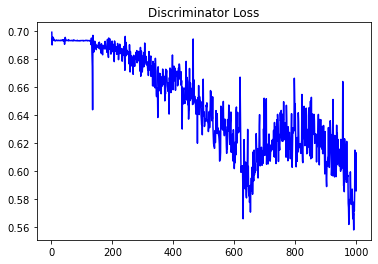

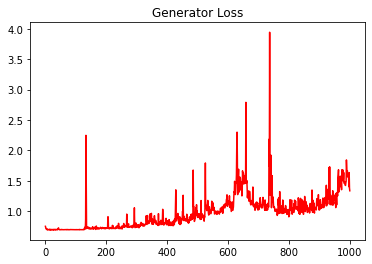

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.2977636756002903


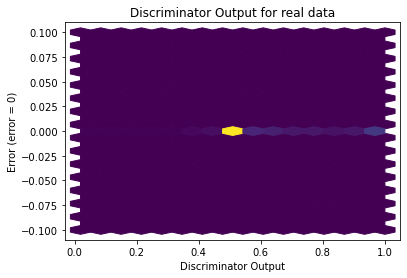

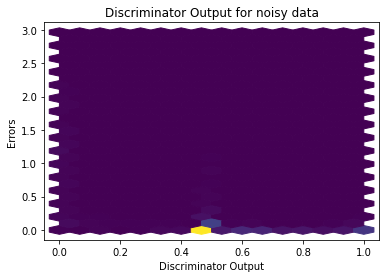

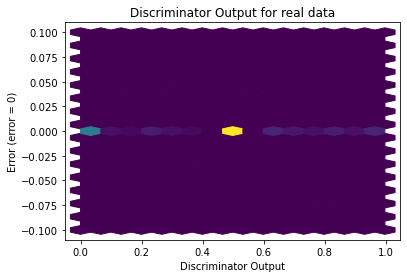

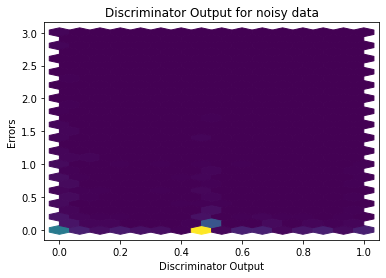

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

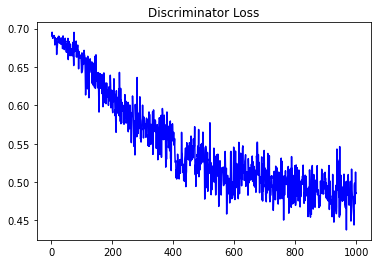

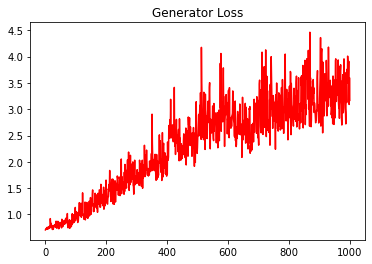

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.24595667857676745


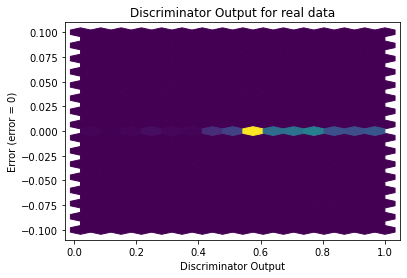

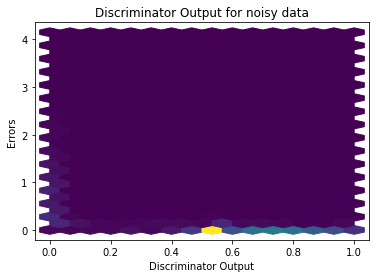

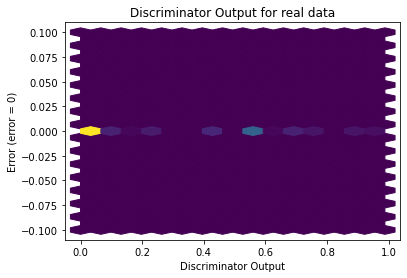

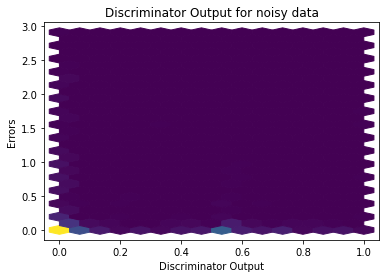

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


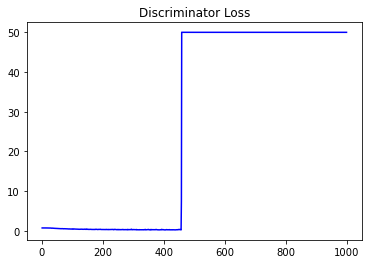

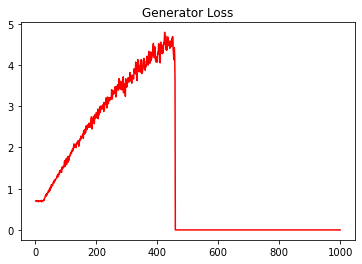

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
527.848286003913


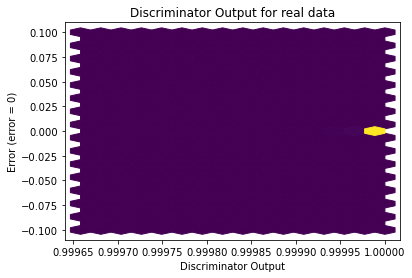

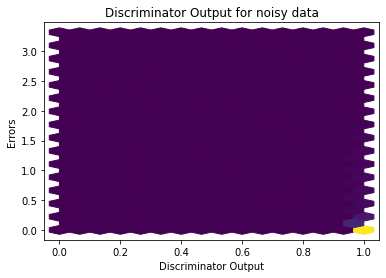

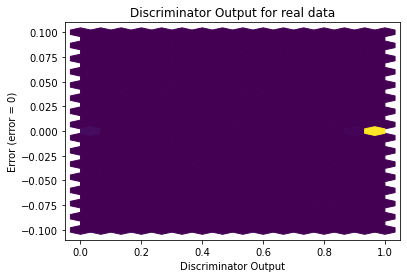

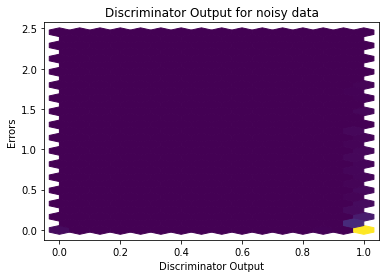

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


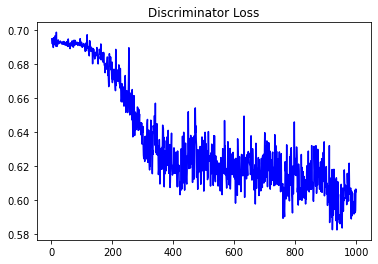

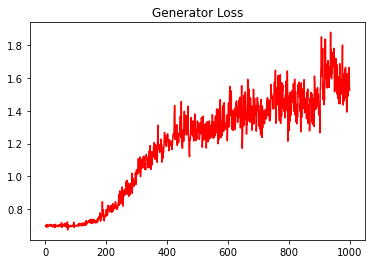

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.30083186543295526


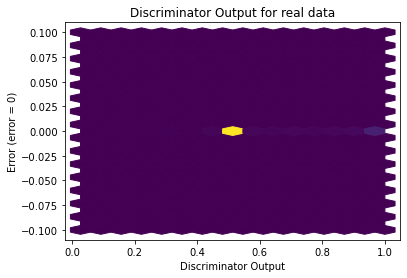

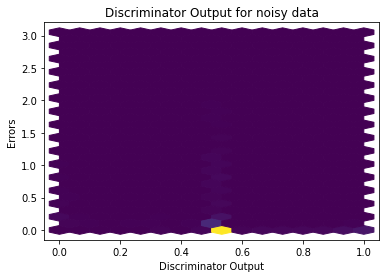

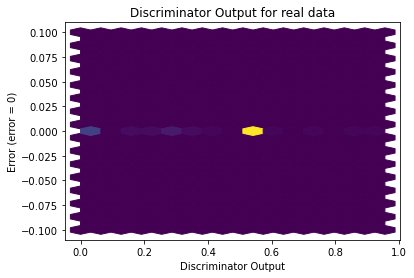

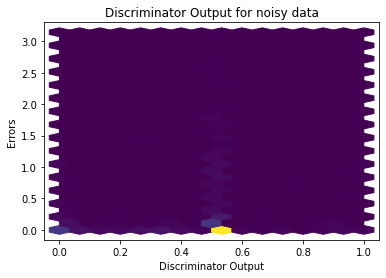

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0105]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1342]], requires_grad=True)
